In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [2]:
#Loading CSV file into Dataframe.
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<h2>Data Cleaning</h2>

In [3]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'] , axis=1) #Droping unnecessary columns.
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [6]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
df.IsActiveMember.unique()

array([1, 0], dtype=int64)

In [8]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [10]:
df.NumOfProducts.describe()

count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: NumOfProducts, dtype: float64

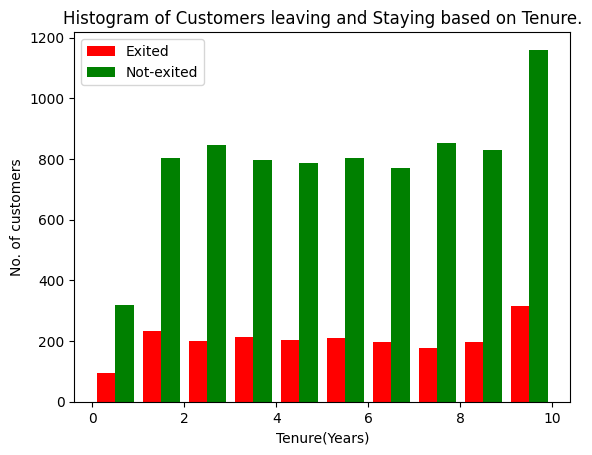

In [11]:
tenure_churn_yes = df[df.Exited == 1].Tenure
tenure_churn_no = df[df.Exited == 0].Tenure

#Ploting histogram of Exited and Not-exited customers based on their Tenure.
plt.hist([tenure_churn_yes,tenure_churn_no], color= ['red', 'green'], label=['Exited', 'Not-exited'])
plt.xlabel('Tenure(Years)')
plt.ylabel('No. of customers')
plt.title('Histogram of Customers leaving and Staying based on Tenure.')
plt.legend()

<h2>Data Scalling</h2>

In [12]:
for col in df:
    print(f'{col}: {df[col].unique()}')

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

In [13]:
df['Gender'].replace({'Male':1, 'Female':0}, inplace=True)
df.Gender.unique()

array([0, 1], dtype=int64)

In [14]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6587,707,France,0,33,2,58036.33,1,1,1,83335.78,0
316,559,France,1,49,2,147069.78,1,1,0,120540.83,1
5656,663,France,0,27,9,0.00,2,1,0,150850.29,0
5036,699,Germany,1,59,3,106819.65,1,0,1,163570.25,0
2810,594,France,0,30,10,0.00,2,1,1,124071.71,0


In [15]:
df1 = pd.get_dummies(data=df, columns=['Geography'], dtype=int)

In [16]:
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
3645,788,1,55,3,0.00,1,0,1,13288.46,1,1,0,0
5521,815,1,37,1,166115.42,1,1,0,67208.30,0,1,0,0
2040,547,0,38,5,167539.97,1,0,1,159207.34,0,1,0,0
7445,516,0,45,4,0.00,1,1,0,95273.73,1,1,0,0
2611,566,1,42,3,108010.78,1,1,1,157486.10,0,1,0,0


In [17]:
df1.shape

(10000, 13)

In [18]:
df1.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       int32
Geography_Germany      int32
Geography_Spain        int32
dtype: object

In [19]:
col_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df1[col_to_scale] = scaler.fit_transform(df1[col_to_scale])

In [20]:
df1.sample(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
5095,0.710,0,0.378378,0.5,0.356180,0.000000,0,1,0.695819,0,0,0,1
3655,0.808,1,0.229730,0.6,0.392932,0.333333,0,1,0.530577,0,0,1,0
7292,0.788,1,0.216216,0.3,0.000000,0.333333,1,0,0.136177,0,0,0,1


In [21]:
df1.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.601058,0.545700,0.282727,0.501280,0.304848,0.176733,0.70550,0.515100,0.500441,0.203700,0.501400,0.250900,0.247700
std,0.193307,0.497932,0.141727,0.289217,0.248696,0.193885,0.45584,0.499797,0.287580,0.402769,0.500023,0.433553,0.431698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.468000,0.000000,0.189189,0.300000,0.000000,0.000000,0.00000,0.000000,0.254977,0.000000,0.000000,0.000000,0.000000
50%,0.604000,1.000000,0.256757,0.500000,0.387402,0.000000,1.00000,1.000000,0.500960,0.000000,1.000000,0.000000,0.000000
75%,0.736000,1.000000,0.351351,0.700000,0.508749,0.333333,1.00000,1.000000,0.746955,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h2>Data Modelling</h2>

In [22]:
X = df1.drop('Exited', axis=1)
y = df1.Exited

In [23]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [24]:
#Output result is imbalanced. To balance the data use SMOTE to create duplicate samples to train our model on balanced data.

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=20)

In [26]:
X_train.shape

(12740, 12)

In [27]:
X_test.shape

(3186, 12)

<h2>Creating Model using Sklearn</h2>

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

<b>Finding best model by using Hyper parameter tuning(GridSearchCV)</b>

In [29]:
model_params = {
    'logistic_regression' : {
        'model' : LogisticRegression(max_iter=4000),
        'params' : {
            'C' : [1,10,20],
            'solver' : ['liblinear', 'saga']
        }
    },
    'random_forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators' : [1,5,10],
            'criterion' : ["gini", "entropy"]
        }
    },
    'svm':{
        'model' : svm.SVC(),
        'params' : {
            'C' : [1,10,20],
            'kernel' : ['linear', 'poly', 'rbf']
        }
    },
    'XGB_Classifier' : {
        'model' : XGBClassifier(),
        'params' : {
            'n_estimators' : [1,5,10]
        }
    },
    'decisionTree_classifier' : {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'criterion' : ["gini", "entropy"]
        }
    }
}

In [30]:
scores = [ ]
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [31]:
df_scores = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df_scores

,model,best_score,best_params
0,logistic_regression,0.715385,"{'C': 10, 'solver': 'liblinear'}"
1,random_forest,0.875903,"{'criterion': 'entropy', 'n_estimators': 10}"
2,svm,0.812559,"{'C': 20, 'kernel': 'rbf'}"
3,XGB_Classifier,0.844898,{'n_estimators': 10}
4,decisionTree_classifier,0.832104,{'criterion': 'entropy'}


<i>RandomForestClassifier has the best score of <b>0.87</b> with parameters <b>'criterion': 'entropy', 'n_estimators': 10</b></i>

In [32]:
model_rf = RandomForestClassifier(n_estimators=10,criterion='entropy')
model_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [33]:
model_rf.score(X_test, y_test)

0.8722536095417451

In [34]:
y_pred_rf = model_rf.predict(X_test)
y_pred_rf

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [35]:
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[1414,  155],
       [ 252, 1365]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

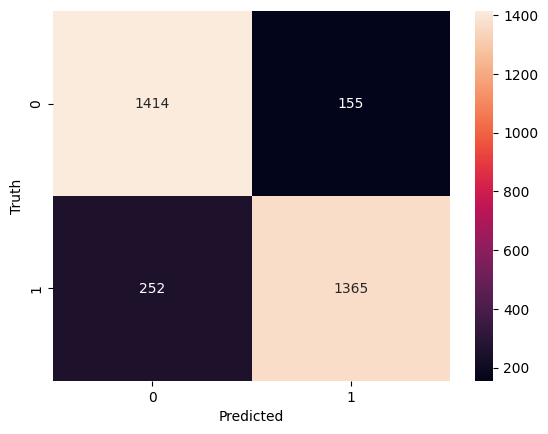

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
sn.heatmap(cm_rf, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3>Classification report of Sklearn RandomForestClassifier</h3>

In [37]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1569
           1       0.90      0.84      0.87      1617

    accuracy                           0.87      3186
   macro avg       0.87      0.87      0.87      3186
weighted avg       0.87      0.87      0.87      3186



<h2>Creating Model using Tensorflow keras</h2>

In [38]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(64, input_shape=(12,), activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

C:\Users\abhin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6174 - loss: 0.6517  
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7002 - loss: 0.5738  
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7257 - loss: 0.5455  
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7358 - loss: 0.5313
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7533 - loss: 0.5027  
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7679 - loss: 0.4797  
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7752 - loss: 0.4667
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7744 - loss: 0.4685
Epoch 9/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7840 - loss: 0.4561  
Epoch 10/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7886 - loss: 0.4462
Epoch 11/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7773 - loss: 0.4582
Epoch 12/100
399/399 ━━━━━━━━

In [39]:
model.evaluate(X_test, y_test)

100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8227 - loss: 0.3898   


[0.3821811079978943, 0.8245449066162109]

In [40]:
yp = model.predict(X_test)
yp[:5]

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step   


array([[0.98001   ],
       [0.9679673 ],
       [0.98403156],
       [0.99995595],
       [0.8388791 ]], dtype=float32)

In [41]:
y_test[:10]

12046    1
54       1
13411    1
1005     1
9048     0
13848    1
15120    1
3455     0
274      0
7565     1
Name: Exited, dtype: int64

In [42]:
y_pred_keras = []
for i in yp:
    if i>0.5:
        y_pred_keras.append(1)
    else:
        y_pred_keras.append(0)

y_pred_keras[:10]

[1, 1, 1, 1, 1, 0, 1, 0, 0, 1]

Text(50.722222222222214, 0.5, 'Truth')

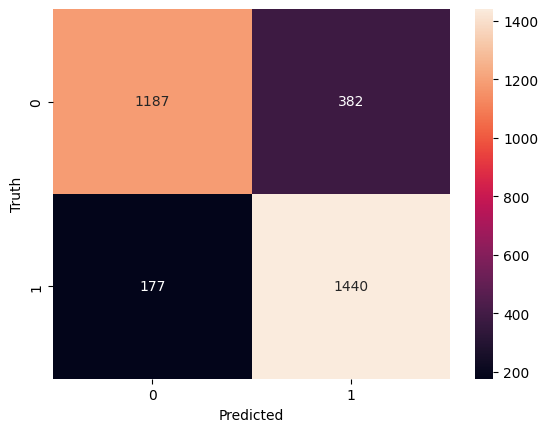

In [43]:
import seaborn as sn
cm_keras = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_keras)

sn.heatmap(cm_keras, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3>Classification Report of Tensorflow keras</h3>

In [44]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred_keras))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1569
           1       0.79      0.89      0.84      1617

    accuracy                           0.82      3186
   macro avg       0.83      0.82      0.82      3186
weighted avg       0.83      0.82      0.82      3186



<h2>Conclusion:</h2>
<ul>
    <li>Performed Data cleaning by dropping unnecessary columns and null values.</li>
    <li>Applied Data Scalling using <b>one-hot-encoding</b> and <b>MinMaxScaler</b>.</li>
    <li>Data is imbalanced, to balance the data <b>over-sampling</b> is done to train model on balanced data.</li>
    <li>Created two models using <b>Sklearn</b> and <b>tensorflow</b>.</li>
    <li>In sklearn, Used Hyper parameter tuning to find best classifier and parameters to fit the model.</li>
    <li>In tensorflow, created three neural networks using relu and sigmoid activation functions.</li>
    <li>
        Out of these two, <b>RandomForestClassifier</b> got high score.
        <br>
        Sklearn RandomForest accuracy : <b>~87%</b>
        <br>
        Tensorflow keras accuracy : <b>~82%</b>
    </li>
</ul>